# 505 Service Unavailable: Measurements

by Gaspar, Lamprecht amd Niederhauser

In [260]:
import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
import seaborn as sns
import random
import glob
import sweetviz as sv
import plotly.express as px
import matplotlib.ticker as mtick
import dataframe_image as dfi

pd.options.display.float_format = '{:,}'.format
pd.set_option('display.max_rows', 50)

In [261]:
data = [] # pd.concat takes a list of dataframes as an agrument
    
globbed_files = glob.glob("./measurements/jakov/**/*.csv", recursive=True) #creates a list of all csv files

for csv in globbed_files:
    frame = pd.read_csv(csv)
    frame['measured'] = os.path.basename(csv)
    frame['by'] = 'Jakov'
    full_folder_path = os.path.dirname(csv)
    frame['device'] = os.path.basename(full_folder_path)
    data.append(frame)
    
globbed_files1 = glob.glob("./measurements/johannes/**/*.csv", recursive=True) #creates a list of all csv files

for csv in globbed_files1:
    frame = pd.read_csv(csv)
    frame['measured'] = os.path.basename(csv)
    frame['by'] = 'Johannes'
    full_folder_path = os.path.dirname(csv)
    frame['device'] = os.path.basename(full_folder_path)
    data.append(frame)
    
globbed_files2 = glob.glob("./measurements/patrick/**/*.csv", recursive=True) #creates a list of all csv files

for csv in globbed_files2:
    frame = pd.read_csv(csv)
    frame['measured'] = os.path.basename(csv)
    frame['by'] = 'Patrick'
    full_folder_path = os.path.dirname(csv)
    frame['device'] = os.path.basename(full_folder_path)
    data.append(frame)

df_measurements = pd.concat(data, ignore_index=True)

# removing .csv at the end of column measured
df_measurements['measured'] = df_measurements['measured'].str[:-4]

# splitting column measured and adding 2 new columns for it in our dataframe
new = df_measurements['measured'].str.split("_", n = -1, expand = True)

new1 = new[0].str.split("-", n = -1, expand = True)
df_measurements['measured_model']= new1[0]
df_measurements['measured_compiler']= new[1]
  
# Dropping old column measured
#df_measurements.drop(columns =["measured"], inplace = True)

#df_measurements.to_csv("df_measurements.csv")

In [262]:
df_measurements['measured'] = df_measurements['measured_model'].str.upper() + " - " + df_measurements['measured_compiler'].str.upper()

In [263]:
df_measurements

function       bandwidth [B/s]  avg. execution time [s]  \
0       copy 149,685,581,073.74344             0.0035866575   
1        mul  149,582,498,172.5372             0.0035891292   
2        add 154,908,663,954.01996             0.0051985883   
3      triad 154,936,563,089.00394       0.0051976521999999   
4        dot 164,840,477,263.13992             0.0032569119   
..       ...                   ...                      ...   
490     copy  35,614,900,930.28322              0.015074334   
491      mul  35,469,356,026.84692               0.01513619   
492      add  33,342,337,225.11887       0.0241526669999999   
493    triad  33,444,454,093.27103              0.024078921   
494      dot  31,267,949,512.19298       0.0171700069999999   

          CI start [s]         CI end [s]     measured       by  \
0   0.0035848686667293 0.0035884463332707  OCL - CLANG    Jakov   
1   0.0035872047867738 0.0035910536132261  OCL - CLANG    Jakov   
2   0.0051965099591248 0.0052006666408751  OCL - CLANG    Jakov   
3    0.005195512591663 0.0051997918083369  OCL - CLANG    Jakov   
4   0.0032531867913816 0.0032606370086183  OCL - CLANG    Jakov   
..                 ...                ...          ...      ...   
490 0.0149810075665329  0.015167660433467    OCL - GCC  Patrick   
491 0.0150588083931088 0.0152135716068911    OCL - GCC  Patrick   
492 0.0240125691970871 0.0242927648029128    OCL - GCC  Patrick   
493 0.0239451918805532 0.0242126501194468    OCL - GCC  Patrick   
494 0.0170820727206233 0.0172579412793766    OCL - GCC  Patrick   

                          device measured_model measured_compiler  
0    NVIDIA Geforce GTX 1060 6GB            ocl             clang  
1    NVIDIA Geforce GTX 1060 6GB            ocl             clang  
2    NVIDIA Geforce GTX 1060 6GB            ocl             clang  
3    NVIDIA Geforce GTX 1060 6GB            ocl             clang  
4    NVIDIA Geforce GTX 1060 6GB            ocl             clang  
..                           ...            ...               ...  
490       Intel i7-9850H-Windows            ocl               gcc  
491       Intel i7-9850H-Windows            ocl               gcc  
492       Intel i7-9850H-Windows            ocl               gcc  
493       Intel i7-9850H-Windows            ocl               gcc  
494       Intel i7-9850H-Windows            ocl               gcc  

[495 rows x 10 columns]

In [264]:
df_measurements.groupby(by=['device', 'measured_model', 'function', 'measured_compiler']).mean()
#df_measurements.count()

bandwidth [B/s]  \
device                      measured_model function measured_compiler                         
BROADCOM BCM2837            acc            add      gcc                2,062,053,513.862911   
                                           copy     gcc               2,415,885,072.4816856   
                                           dot      gcc               1,990,031,534.0396883   
                                           mul      gcc                1,871,162,815.185974   
                                           triad    gcc                2,061,536,946.573105   
...                                                                                     ...   
NVIDIA Geforce GTX 1060 6GB ocl            dot      gcc                163,529,270,431.6968   
                                           mul      clang              149,582,498,172.5372   
                                                    gcc               149,010,325,762.15875   
                                           triad    clang             154,936,563,089.00394   
                                                    gcc                 153,997,930,596.265   

                                                                       avg. execution time [s]  \
device                      measured_model function measured_compiler                            
BROADCOM BCM2837            acc            add      gcc                            0.058194416   
                                           copy     gcc                            0.033114158   
                                           dot      gcc                            0.040200368   
                                           mul      gcc                            0.042754163   
                                           triad    gcc                            0.058208998   
...                                                                                        ...   
NVIDIA Geforce GTX 1060 6GB ocl            dot      gcc                           0.0032830264   
                                           mul      clang                         0.0035891292   
                                                    gcc                           0.0036029108   
                                           triad    clang                   0.0051976521999999   
                                                    gcc                           0.0052293324   

                                                                            CI start [s]  \
device                      measured_model function measured_compiler                      
BROADCOM BCM2837            acc            add      gcc               0.0581284591517034   
                                           copy     gcc               0.0330477707428913   
                                           dot      gcc               0.0401240599752002   
                                           mul      gcc               0.0426706170993602   
                                           triad    gcc               0.0581419297312598   
...                                                                                  ...   
NVIDIA Geforce GTX 1060 6GB ocl            dot      gcc               0.0032646754256609   
                                           mul      clang             0.0035872047867738   
                                                    gcc                0.003591091392952   
                                           triad    clang              0.005195512591663   
                                                    gcc               0.0052101600045685   

                                                                              CI end [s]  
device                      measured_model function measured_compiler                     
BROADCOM BCM2837            acc            add      gcc               0.0582603728482965  
                                           copy     gcc               0.0331805452571086  
    

In [265]:
df_max_bandwidth = pd.read_csv(os.path.join('./','max_mem_bandwidth.csv'), delimiter=',')
df_max_bandwidth

device  device data rate [MT/s]  \
0               Intel i5-6600K                      NaN   
1  NVIDIA Geforce GTX 1060 6GB                      NaN   
2             Intel Xeon L5420                      NaN   
3               Intel i7-7500U                      NaN   
4              Intel i7-2670QM                      NaN   
5             BROADCOM BCM2837                      NaN   
6               Intel i7-9850H                  2,667.0   
7       Intel i7-9850H-Windows                  2,667.0   

   device  memory width [byte]  device memory channels  \
0                         64.0                     2.0   
1                          NaN                     NaN   
2                         64.0                     2.0   
3                         64.0                     2.0   
4                         64.0                     2.0   
5                         64.0                     1.0   
6                          8.0                     2.0   
7                          8.0                     2.0   

   device max memory bandwidth [MB/s]  
0                               25600  
1                              192000  
2                                8528  
3                               29872  
4                               21328  
5                                6400  
6                               42627  
7                               42627

In [266]:
df_measurements = df_measurements.merge(df_max_bandwidth, on='device', how='left')

In [267]:
df_measurements.loc[df_measurements['device']=='Intel i5-6600K']

function       bandwidth [B/s]  avg. execution time [s]       CI start [s]  \
15     copy  14,478,756,795.05535              0.037079904 0.0370632565885836   
16      mul 14,504,010,972.099382       0.0370153409999999 0.0370020602472784   
17      add  16,217,595,107.75029              0.049656337 0.0495745470107336   
18    triad 16,241,452,113.496778              0.049583397 0.0495531485644342   
19      dot 21,512,173,007.471764               0.02495661 0.0248947036473953   
..      ...                   ...                      ...                ...   
80     copy 14,111,079,266.665646       0.0380460559999999 0.0379046982160906   
81      mul 14,202,855,650.877483              0.037800209 0.0376571025057901   
82      add  16,331,078,825.41596              0.049311278 0.0491615801062171   
83    triad 16,220,326,569.210527              0.049647975 0.0494910832043516   
84      dot 12,893,198,403.308558              0.041639855 0.0414873099714205   

           CI end [s]     measured     by          device measured_model  \
15 0.0370965514114163  OMP - CLANG  Jakov  Intel i5-6600K            omp   
16 0.0370286217527215  OMP - CLANG  Jakov  Intel i5-6600K            omp   
17 0.0497381269892663  OMP - CLANG  Jakov  Intel i5-6600K            omp   
18 0.0496136454355658  OMP - CLANG  Jakov  Intel i5-6600K            omp   
19 0.0250185163526046  OMP - CLANG  Jakov  Intel i5-6600K            omp   
..                ...          ...    ...             ...            ...   
80 0.0381874137839093    ACC - GCC  Jakov  Intel i5-6600K            acc   
81 0.0379433154942098    ACC - GCC  Jakov  Intel i5-6600K            acc   
82 0.0494609758937828    ACC - GCC  Jakov  Intel i5-6600K            acc   
83 0.0498048667956483    ACC - GCC  Jakov  Intel i5-6600K            acc   
84 0.0417924000285794    ACC - GCC  Jakov  Intel i5-6600K            acc   

   measured_compiler  device data rate [MT/s]  device  memory width [byte]  \
15             clang                      NaN                         64.0   
16             clang                      NaN                         64.0   
17             clang                      NaN                         64.0   
18             clang                      NaN                         64.0   
19             clang                      NaN                         64.0   
..               ...                      ...                          ...   
80               gcc                      NaN                         64.0   
81               gcc                      NaN                         64.0   
82               gcc                      NaN                         64.0   
83               gcc                      NaN                         64.0   
84               gcc                      NaN                         64.0   

    device memory channels  device max memory bandwidth [MB/s]  
15                     2.0                               25600  
16                     2.0                               25600  
17                     2.0                               25600  
18                     2.0                               25600  
19                     2.0                               25600  
..                     ...                                 ...  
80                     2.0                               25600  
81                     2.0                               25600  
82                     2.0                               25600  
83                     2.0                               25600  
84                     2.0                               25600  

[70 rows x 14 columns]

In [268]:
df_measurements['Fraction of theoretical peak'] = ((df_measurements['bandwidth [B/s]']/(1000*1000)) / df_measurements['device max memory bandwidth [MB/s]'])

In [269]:
df_measurements.loc[df_measurements['device']=='Intel i5-6600K']
df_measurements.head(50)

function       bandwidth [B/s]  avg. execution time [s]       CI start [s]  \
0      copy 149,685,581,073.74344             0.0035866575 0.0035848686667293   
1       mul  149,582,498,172.5372             0.0035891292 0.0035872047867738   
2       add 154,908,663,954.01996             0.0051985883 0.0051965099591248   
3     triad 154,936,563,089.00394       0.0051976521999999  0.005195512591663   
4       dot 164,840,477,263.13992             0.0032569119 0.0032531867913816   
5      copy   148,114,737,674.146       0.0036246960999999 0.0036034829377035   
6       mul 147,870,308,977.55267             0.0036306877 0.0036142143634397   
7       add 152,718,057,065.42993             0.0052731575 0.0052455605829907   
8     triad 152,363,620,691.03177             0.0052854242 0.0052537517659957   
9       dot  162,226,184,138.5383             0.0033093974 0.0032879194584808   
10     copy  149,413,208,153.0319             0.0035931958 0.0035860294380306   
11      mul 149,010,325,762.15875             0.0036029108  0.003591091392952   
12      add 153,945,885,533.87137       0.0052311002999999 0.0052111886030155   
13    triad   153,997,930,596.265             0.0052293324 0.0052101600045685   
14      dot  163,529,270,431.6968             0.0032830264 0.0032646754256609   
15     copy  14,478,756,795.05535              0.037079904 0.0370632565885836   
16      mul 14,504,010,972.099382       0.0370153409999999 0.0370020602472784   
17      add  16,217,595,107.75029              0.049656337 0.0495745470107336   
18    triad 16,241,452,113.496778              0.049583397 0.0495531485644342   
19      dot 21,512,173,007.471764               0.02495661 0.0248947036473953   
20     copy 13,556,977,211.579948              0.039601078 0.0394808459751288   
21      mul 12,682,897,923.031645       0.0423303029999999 0.0422424450940026   
22      add 14,002,296,337.575603               0.05751245 0.0572730190974172   
23    triad 13,780,639,249.931198       0.0584375189999999 0.0582124700261086   
24      dot  12,257,290,937.59726       0.0438001279999999 0.0436312779799271   
25     copy  14,465,231,690.38664              0.037114574 0.0370182806612784   
26      mul 14,479,229,675.112871              0.037078693 0.0369704470624992   
27      add 16,266,258,919.305206               0.04950778 0.0493776298939022   
28    triad 16,247,869,877.320974              0.049563812 0.0493962404980959   
29      dot  21,804,296,787.95031              0.024622253 0.0245423889490051   
30     copy 14,420,910,050.360954              0.037228643 0.0372054983772111   
31      mul  14,340,461,864.81888       0.0374374909999999 0.0373137715881308   
32      add 15,990,701,360.555077              0.050360916 0.0502598522481941   
33    triad   16,011,445,279.4843       0.0502956699999999 0.0502549469621336   
34      dot 20,784,541,131.327984       0.0258302989999999 0.0257473246733794   
35     copy 14,446,387,530.690144              0.037162987 0.0371378735430432   
36      mul 14,485,436,598.767958              0.037062805 0.0370470334526278   
37      add 16,171,034,334.189882              0.049799311 0.0497611920882151   
38    triad 16,154,331,886.348867       0.0498507999999999 0.0497277242401085   
39      dot 21,793,257,769.266754              0.024634725 0.0246037104818044   
40     copy  14,427,865,364.30278              0.037210696 0.0371792730169298   
41      mul 14,371,136,932.019234              0.037357581 0.0373307214342056   
42      add 16,005,784,217.698092       0.0503134589999999 0.0502631883073606   
43    triad 16,010,762,137.266554              0.050297816 0.0502288210414384   
44      dot 21,092,069,415.800915              0.025453686 0.0254244039969093   
45     copy   14,351,153,117.0835              0.037409601 0.0371664874333817   
46      mul 14,305,256,881.870176       0.0375296239999999 0.0373314086875796   
47      add 15,991,122,723.420158              0.050359589 0.0503127140526693   
48    triad  15,993,829,246.95518 

In [270]:
my_report = sv.analyze(df_measurements)
#my_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

In [271]:
df_measurements.groupby(["measured"]).mean().sort_values(by='bandwidth [B/s]', ascending=False)

bandwidth [B/s]  avg. execution time [s]  \
measured                                                        
CUDA - GCC     152,658,581,709.33975      0.00422467257999998   
OCL - CLANG      61,508,045,998.5296      0.01735261815499997   
OCL - GCC      61,312,707,372.355675      0.01735923018499997   
TBB - CLANG    13,878,280,703.509092     0.050853013999999974   
KOKKOS - CLANG 13,790,543,763.250635       0.0506820512285714   
KOKKOS - GCC   13,781,187,419.880766     0.050765576742857116   
TBB - GCC      13,777,405,393.821207     0.050972585028571396   
RAJA - CLANG   13,720,729,754.076258      0.05082923214285713   
RAJA - GCC     13,683,400,986.859215      0.05092402794285712   
OMP - GCC      13,140,102,690.451054     0.051732801428571396   
OMP - CLANG    13,119,156,984.932642     0.051911744342857113   
SYCL - CLANG    10,620,724,618.62942      0.08193631885714284   
SYCL - GCC     10,482,817,195.588083      0.08266379868571425   
ACC - GCC        9,662,558,653.90876      0.07597938223999998   
STD20 - GCC     9,338,775,368.391438      0.07688007519999998   
STD - GCC       9,297,115,858.014599      0.07667078583999996   
STD - CLANG     9,067,374,491.042036      0.07947887123999996   

                       CI start [s]           CI end [s]  \
measured                                                   
CUDA - GCC      0.00420098582172208  0.00424835933827782   
OCL - CLANG    0.017290785026285484 0.017414451283714424   
OCL - GCC      0.017293247586139752 0.017425212783860153   
TBB - CLANG     0.05062368017090765  0.05108234782909226   
KOKKOS - CLANG 0.050348992348311486 0.051015110108831266   
KOKKOS - GCC    0.05041115285956268 0.051120000626151525   
TBB - GCC       0.05071637670321962  0.05122879335392314   
RAJA - CLANG    0.05029872378274425  0.05135974050296995   
RAJA - GCC      0.05032492352979843  0.05152313235591577   
OMP - GCC       0.05109905097853873 0.052366551878604034   
OMP - CLANG     0.05122642193244472 0.052597066753269486   
SYCL - CLANG    0.08032431461227045  0.08354832310201515   
SYCL - GCC      0.08083508577099713  0.08449251160043134   
ACC - GCC       0.07580265140786493  0.07615611307213498   
STD20 - GCC      0.0766492603575008   0.0771108900424991   
STD - GCC       0.07645648674443747  0.07688508493556244   
STD - CLANG     0.07932088506133858  0.07963685741866132   

                device data rate [MT/s]  device  memory width [byte]  \
measured                                                               
CUDA - GCC                          NaN                          NaN   
OCL - CLANG                     2,667.0           26.666666666666668   
OCL - GCC                       2,667.0           26.666666666666668   
TBB - CLANG                     2,667.0                         48.0   
KOKKOS - CLANG                  2,667.0                         48.0   
KOKKOS - GCC                    2,667.0                         48.0   
TBB - GCC                       2,667.0                         48.0   
RAJA - CLANG                    2,667.0                         48.0   
RAJA - GCC                      2,667.0                         48.0   
OMP - GCC                       2,667.0                         48.0   
OMP - CLANG                     2,667.0                         48.0   
SYCL - CLANG                    2,667.0                         48.0   
SYCL - GCC                      2,667.0                         48.0   
ACC - GCC                           NaN                         64.0   
STD20 - GCC                         NaN                         64.0   
STD - GCC                           NaN                         64.0   
STD - CLANG                         NaN                         64.0   

                device memory channels  device max memory bandwidth [MB/s]  \
measured                                                                     
CUDA - GCC                         NaN                           192,000.0   
OCL - CLANG                        2.0   

In [272]:
df_measurements.groupby(["device"]).mean().sort_values(by='bandwidth [B/s]', ascending=False)

bandwidth [B/s]  avg. execution time [s]  \
device                                                                       
NVIDIA Geforce GTX 1060 6GB 153,809,554,171.74448     0.004192791179999979   
Intel i7-9850H              21,885,307,649.333332      0.03388144631666663   
Intel i7-9850H-Windows      20,852,658,807.444847      0.03577265971666665   
Intel i7-7500U              17,836,637,413.732555      0.03771627312499999   
Intel i5-6600K              15,355,542,936.340036      0.04281844128571425   
Intel i7-2670QM              12,296,850,545.36677      0.05665529374285711   
Intel Xeon L5420             4,682,519,459.321753       0.1556495567857143   
BROADCOM BCM2837             2,026,565,988.282948      0.04838582785714282   

                                    CI start [s]           CI end [s]  \
device                                                                  
NVIDIA Geforce GTX 1060 6GB  0.00417902378456736 0.004206558575432547   
Intel i7-9850H               0.03290997098400207  0.03485292164933117   
Intel i7-9850H-Windows       0.03441453586301244   0.0371307835703208   
Intel i7-7500U               0.03757636307013888 0.037856183179861044   
Intel i5-6600K               0.04263879657173048  0.04299808599969798   
Intel i7-2670QM              0.05585108190128722 0.057459505584426966   
Intel Xeon L5420             0.15508814685496236   0.1562109667164661   
BROADCOM BCM2837            0.048242805408348535 0.048528850305937093   

                             device data rate [MT/s]  \
device                                                 
NVIDIA Geforce GTX 1060 6GB                      NaN   
Intel i7-9850H                               2,667.0   
Intel i7-9850H-Windows                       2,667.0   
Intel i7-7500U                                   NaN   
Intel i5-6600K                                   NaN   
Intel i7-2670QM                                  NaN   
Intel Xeon L5420                                 NaN   
BROADCOM BCM2837                                 NaN   

                             device  memory width [byte]  \
device                                                     
NVIDIA Geforce GTX 1060 6GB                          NaN   
Intel i7-9850H                                       8.0   
Intel i7-9850H-Windows                               8.0   
Intel i7-7500U                                      64.0   
Intel i5-6600K                                      64.0   
Intel i7-2670QM                                     64.0   
Intel Xeon L5420                                    64.0   
BROADCOM BCM2837                                    64.0   

                             device memory channels  \
device                                                
NVIDIA Geforce GTX 1060 6GB                     NaN   
Intel i7-9850H                                  2.0   
Intel i7-9850H-Windows                          2.0   
Intel i7-7500U                                  2.0   
Intel i5-6600K                                  2.0   
Intel i7-2670QM                                 2.0   
Intel Xeon L5420                                2.0   
BROADCOM BCM2837                                1.0   

                             device max memory bandwidth [MB/s]  \
device                                                            
NVIDIA Geforce GTX 1060 6GB                              192000   
Intel i7-9850H                                            42627   
Intel i7-9850H-Windows                                    42627   
Intel i7-7500U                                            29872   
Intel i5-6600K                                            25600   
Intel i7-2670QM                                           21328   
Intel Xeon L5420                                           8528   
BROADCOM BCM2837                                           6400   

                             Fraction of theoretical peak  
device                                                     
NVIDIA Geforce GTX

In [273]:
df_measurements.groupby(["function"]).mean().sort_values(by='bandwidth [B/s]', ascending=False)

bandwidth [B/s]  avg. execution time [s]         CI start [s]  \
function                                                                       
dot      18,404,603,923.370766     0.061803233936363604 0.060703355686001534   
add      17,878,212,236.876934      0.06627661495050503  0.06582740721923745   
triad     17,767,270,847.08065      0.06655479867474744   0.0660582463085874   
copy     16,949,875,972.543325      0.04650676081212119  0.04616410624662581   
mul      16,915,752,354.807777     0.046788677047474726  0.04645620741574471   

                  CI end [s]  device data rate [MT/s]  \
function                                                
dot      0.06290311218672567                  2,667.0   
add      0.06672582268177255                  2,667.0   
triad    0.06705135104090745                  2,667.0   
copy     0.04684941537761651                  2,667.0   
mul      0.04712114667920471                  2,667.0   

          device  memory width [byte]  device memory channels  \
function                                                        
dot                              50.0      1.8541666666666667   
add                              50.0      1.8541666666666667   
triad                            50.0      1.8541666666666667   
copy                             50.0      1.8541666666666667   
mul                              50.0      1.8541666666666667   

          device max memory bandwidth [MB/s]  Fraction of theoretical peak  
function                                                                    
dot                       29,727.11111111111            0.5492096438770441  
add                       29,727.11111111111            0.5419116391507819  
triad                     29,727.11111111111            0.5393543160105838  
copy                      29,727.11111111111            0.5138069755858509  
mul                       29,727.11111111111            0.5111574647189114

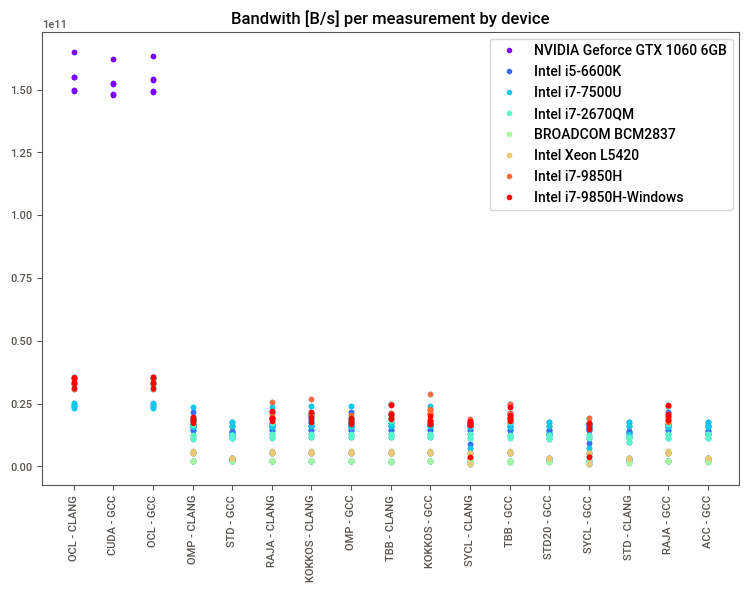

In [274]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(9,6))

#colors = ['b','r','c','y']
labels_cat = df_measurements['device'].unique()
nrof_labels = len(labels_cat)
colors = cm.rainbow(np.linspace(0, 1, nrof_labels))     # create a bunch of colors

for i, r in df_measurements.iterrows():
    #print(int(np.where(devices == r['device'])[0]))
    ax.plot(r['measured'], r['bandwidth [B/s]'], 'o', markersize=3, color=colors[int(np.where(labels_cat == r['device'])[0])], linewidth=0.1, label=r['device'])

#Limit Y-AXIS Range
#ax.set_ylim(0, 40000000000)

plt.scatter(x=df_measurements['measured'], y=df_measurements['bandwidth [B/s]'])
plt.xticks(rotation=90)
plt.title("Bandwith [B/s] per measurement by device")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()

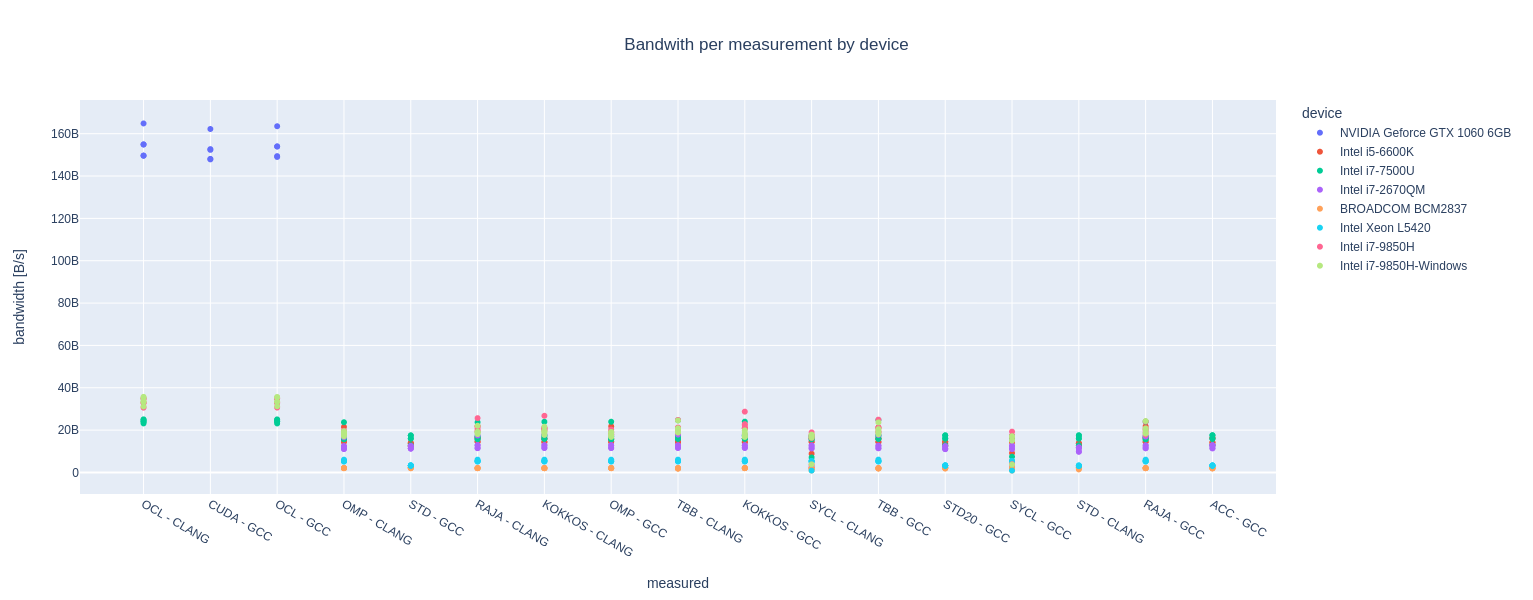

In [275]:
# Plot absolute bamdwith valies per measurement by device
fig = px.scatter(df_measurements, x='measured', y='bandwidth [B/s]', color='device', hover_data=['function'], height=600, title = "Bandwith per measurement by device").update(layout=dict(title=dict(x=0.5)))
fig.show()

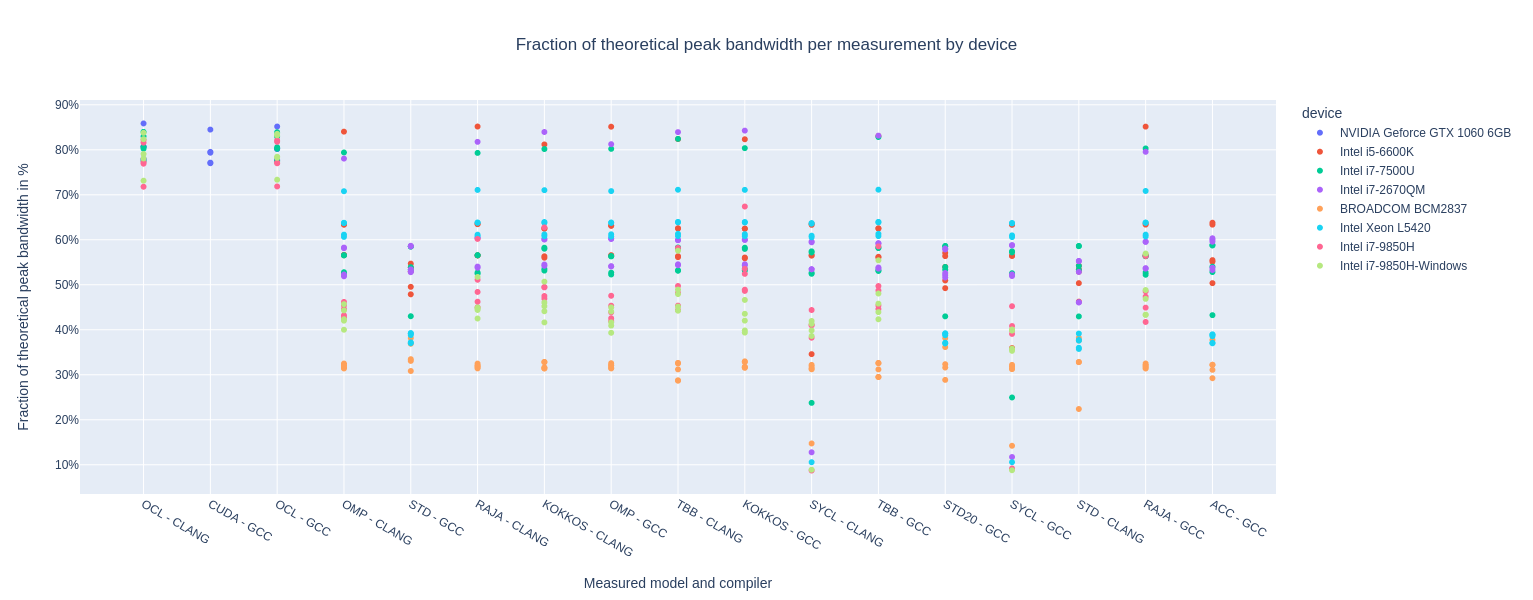

In [ ]:
# Plot relative bamdwith valies per measurement by device
fig = px.scatter(df_measurements, x='measured', y='Fraction of theoretical peak', color='device', hover_data=['function'], height=600, title = "Fraction of theoretical peak bandwidth per measurement by device").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured model and compiler')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.show()

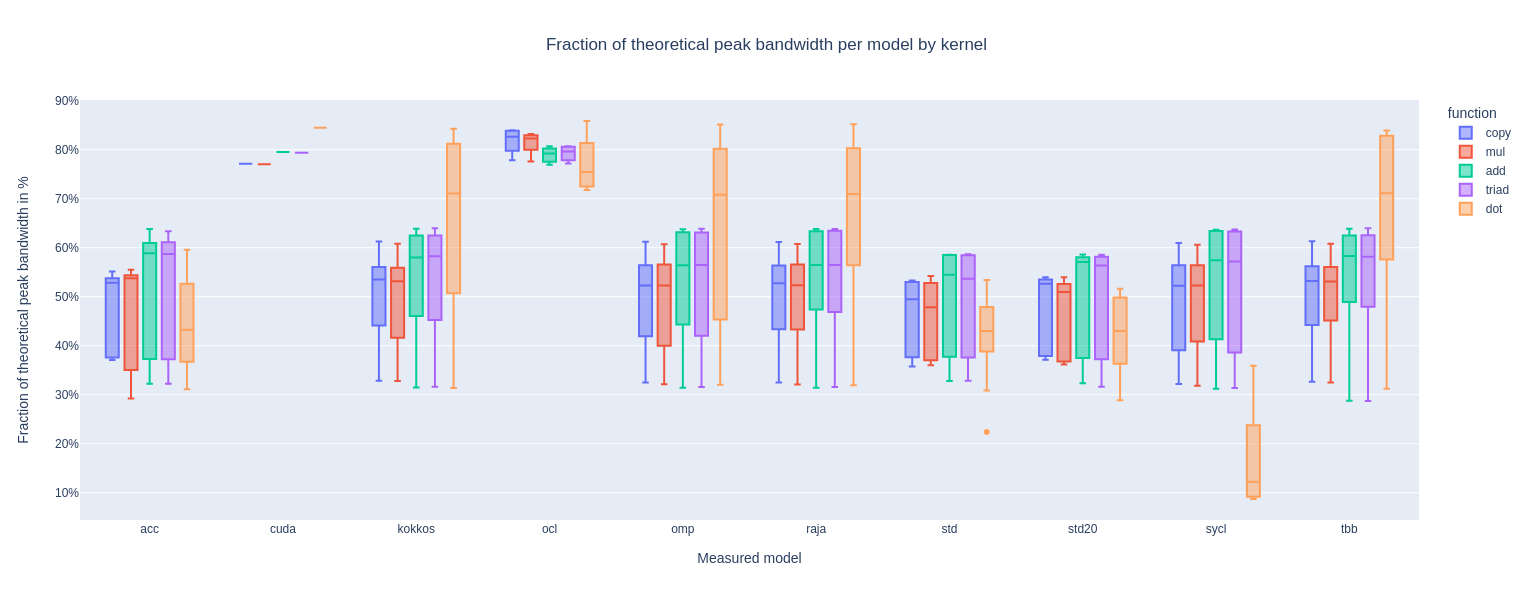

In [ ]:
# Plot relative bamdwith valies per measurement by function
fig = px.box(df_measurements, x='measured_model', y='Fraction of theoretical peak', color='function', hover_data=['device'], points="outliers", height=600, width=1400, title = "Fraction of theoretical peak bandwidth per model by kernel").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured model')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

#fig.write_image("results/model-by-kernel.pdf")

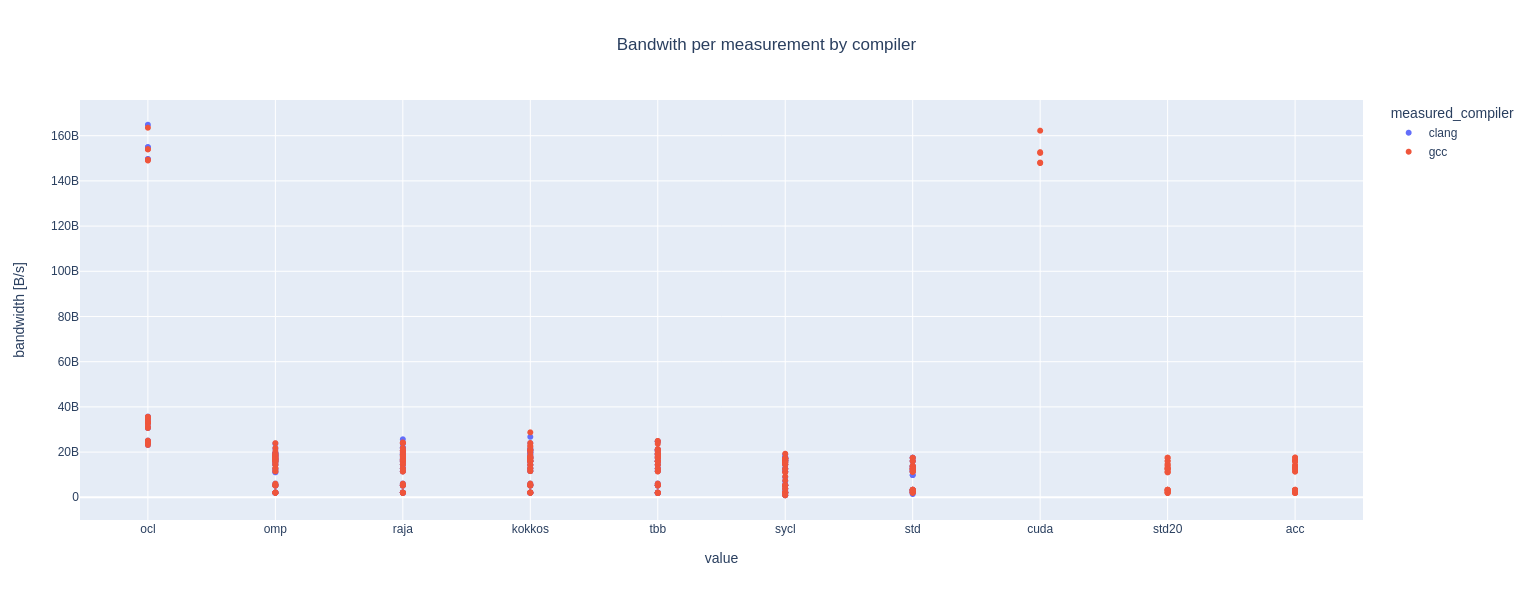

In [ ]:
# Plot absolute bamdwith values per measurement by compiler
fig = px.scatter(df_measurements, x=['measured_model', 'measured_compiler'], y='bandwidth [B/s]', color='measured_compiler', hover_data=['function'], height=600, title = "Bandwith per measurement by compiler").update(layout=dict(title=dict(x=0.5)))
fig.show()

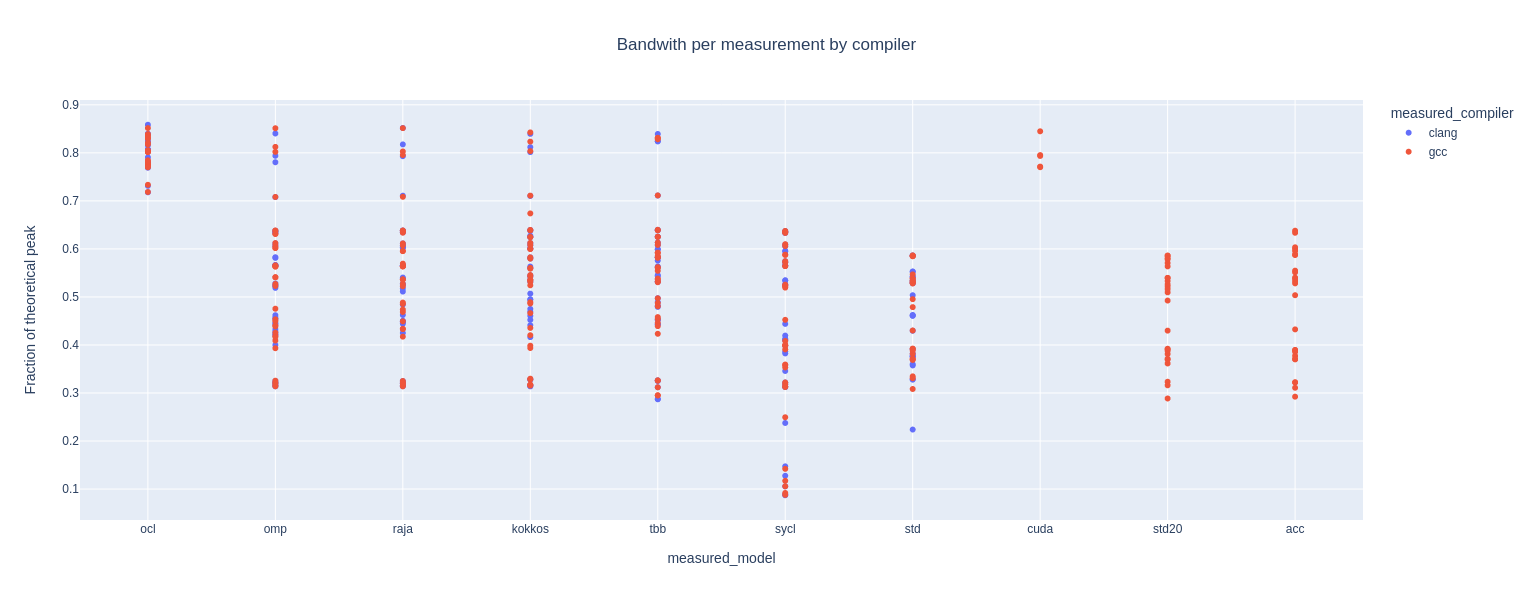

In [ ]:
# Plot relative bamdwith values per measurement by compiler
fig = px.scatter(df_measurements, x='measured_model', y='Fraction of theoretical peak', color='measured_compiler', hover_data=['function'], height=600, title = "Bandwith per measurement by compiler").update(layout=dict(title=dict(x=0.5)))
fig.show()

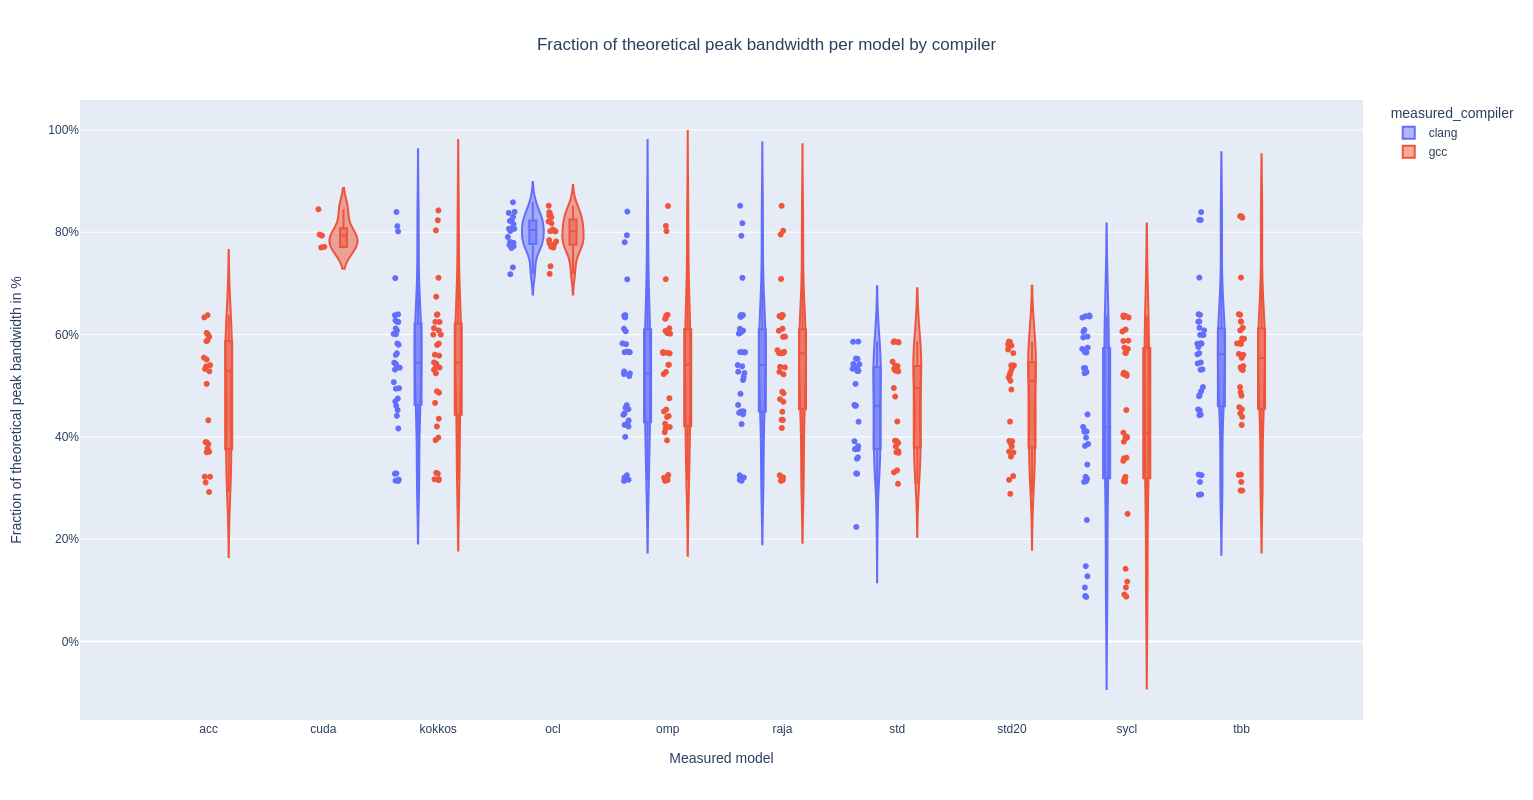

In [ ]:
# Violin Plot relative bamdwith values per measurement model by compiler
fig = px.violin(df_measurements, x="measured_model", y="Fraction of theoretical peak", color='measured_compiler', hover_data=['device', 'measured'], height=800, width=1400, title = "Fraction of theoretical peak bandwidth per model by compiler", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured model')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/compiler-comparison-model.pdf")

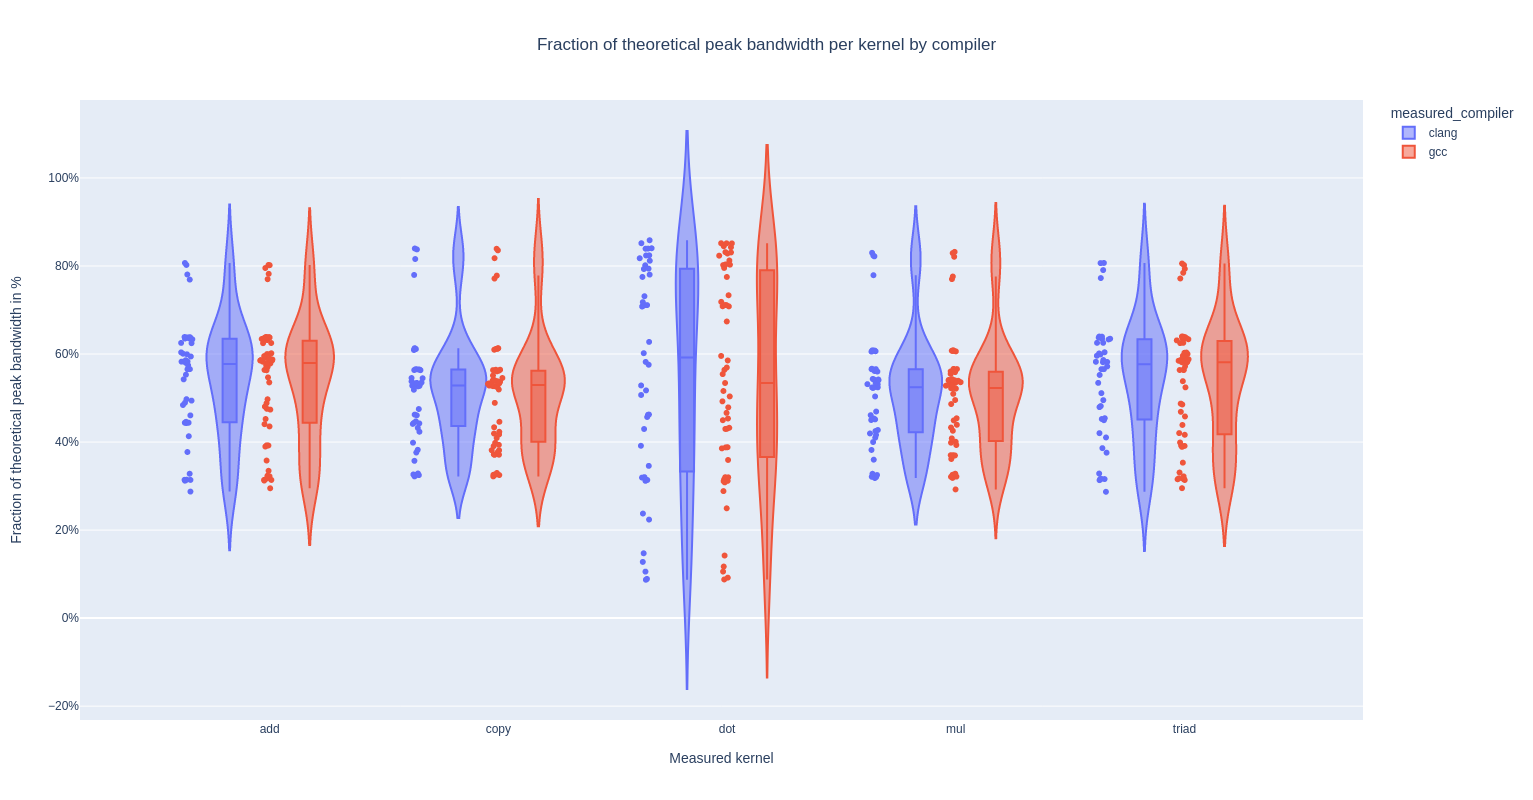

In [ ]:
# Violin Plot relative bamdwith values per measurement function by compiler
fig = px.violin(df_measurements, x="function", y="Fraction of theoretical peak", color='measured_compiler', hover_data=['device', 'measured'], height=800, width=1400, title = "Fraction of theoretical peak bandwidth per kernel by compiler", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured kernel')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/compiler-comparison-kernel.pdf")

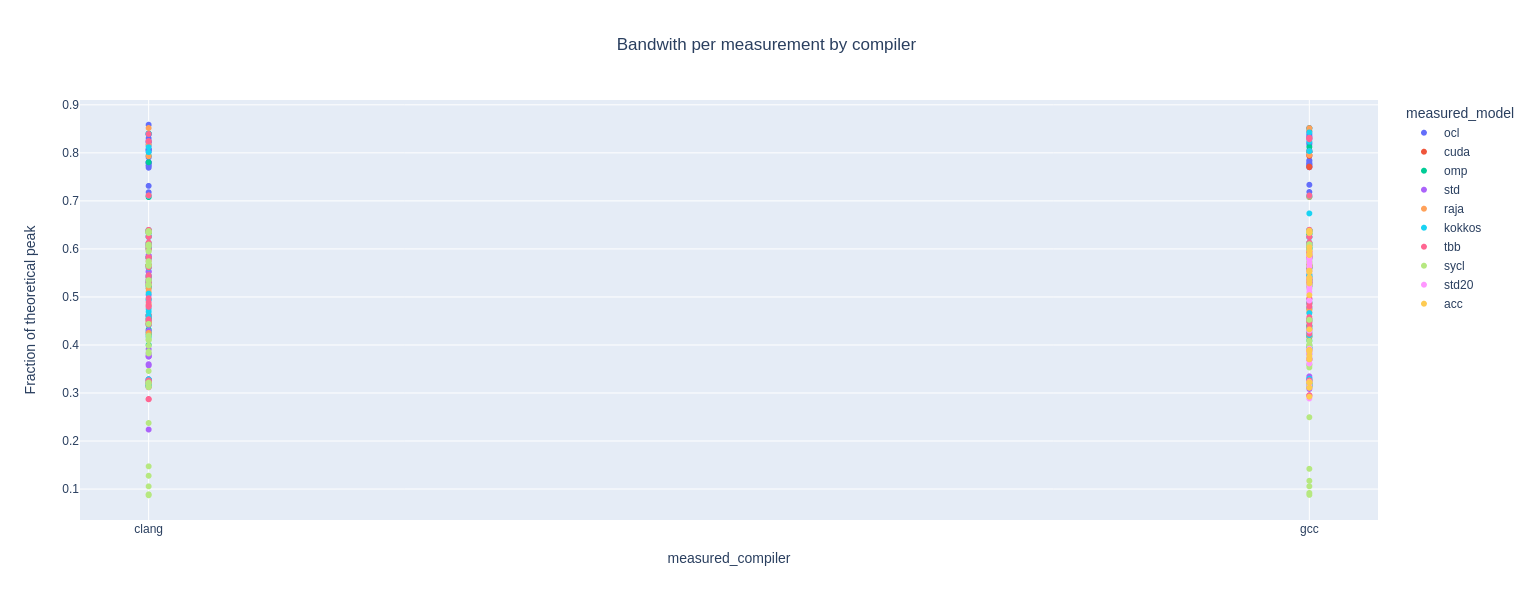

In [ ]:
# Plot relative bamdwith values per measurement by compiler
fig = px.scatter(df_measurements, x='measured_compiler', y='Fraction of theoretical peak', color='measured_model', hover_data=['function'], height=600, title = "Bandwith per measurement by compiler").update(layout=dict(title=dict(x=0.5)))
fig.show()

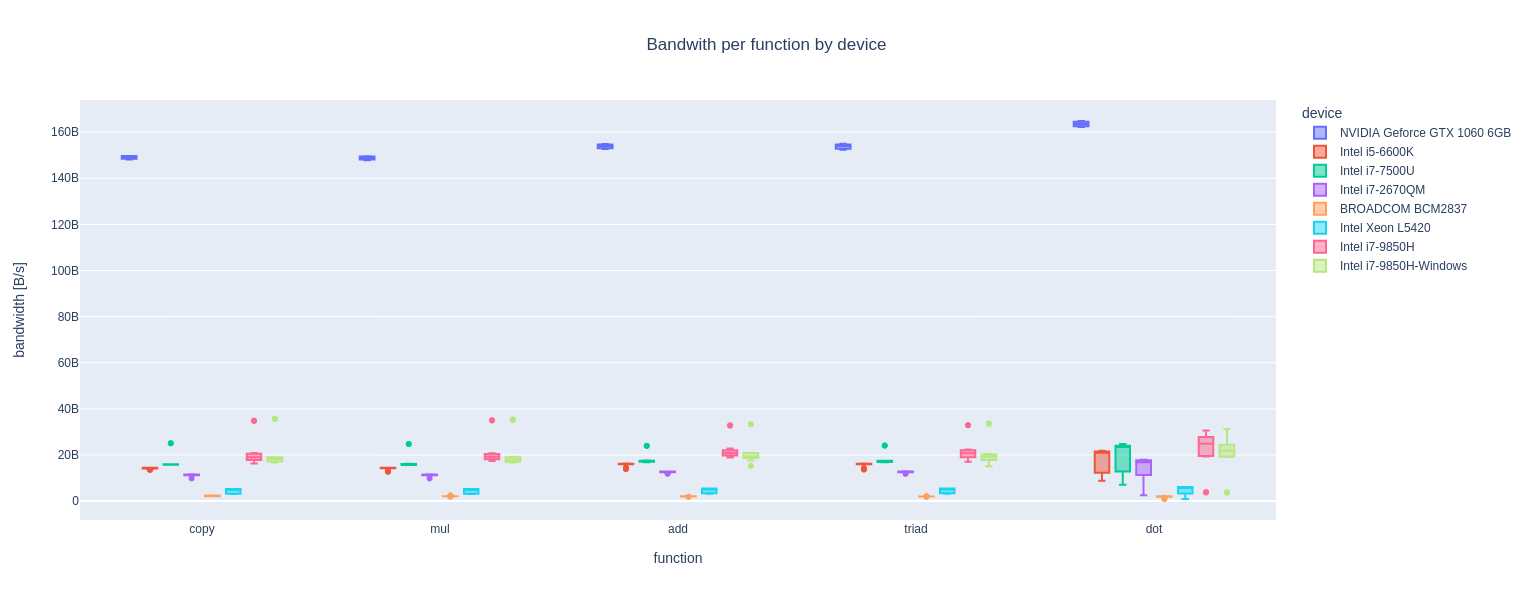

In [ ]:
# Plot absolute bamdwith values per function by device
fig = px.box(df_measurements, x="function", y="bandwidth [B/s]", color='device', hover_data=['device', 'measured'], height=600, title = "Bandwith per function by device").update(layout=dict(title=dict(x=0.5)))
fig.show()

In [ ]:
# Plot relative bamdwith values per function by device
fig = px.box(df_measurements, x="function", y='Fraction of theoretical peak', color='device', hover_data=['device', 'measured'], height=600, title = "Bandwith per function by device").update(layout=dict(title=dict(x=0.5)))
fig.show()

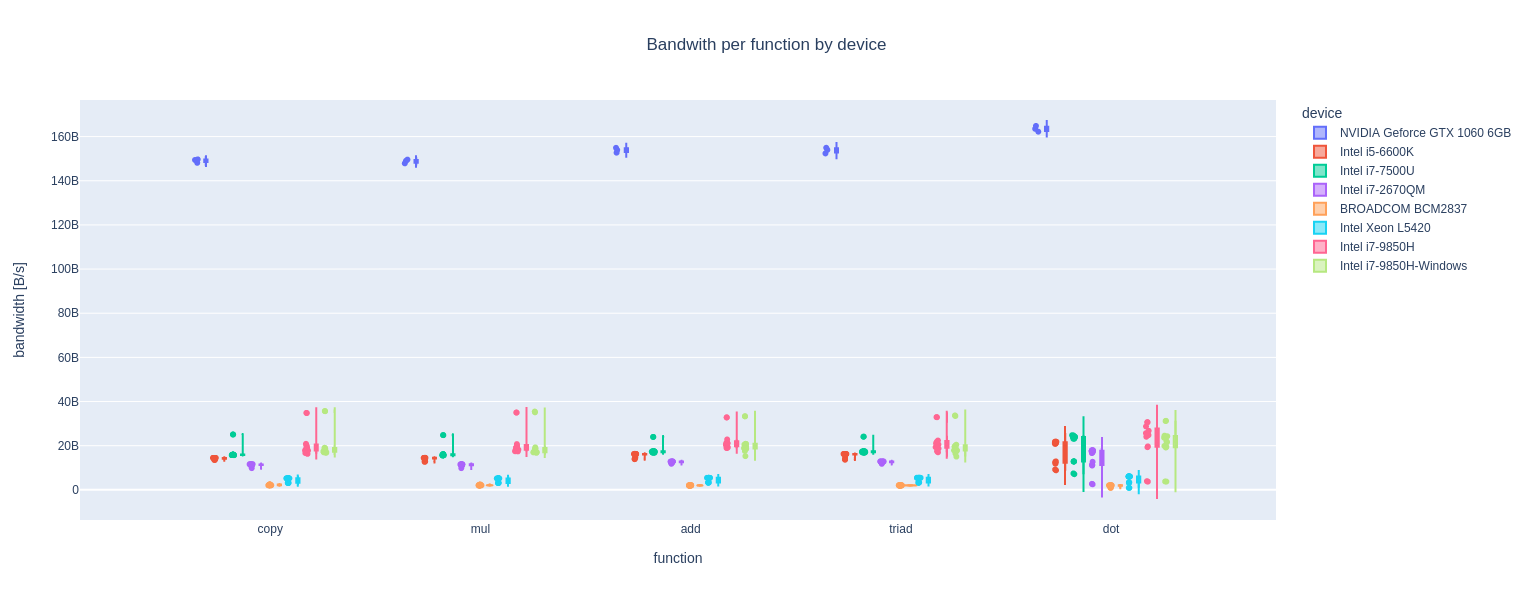

In [ ]:
# Violin Plot absolute bamdwith values per function by device
fig = px.violin(df_measurements, x="function", y="bandwidth [B/s]", color='device', hover_data=['device', 'measured'], height=600, title = "Bandwith per function by device", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.show()

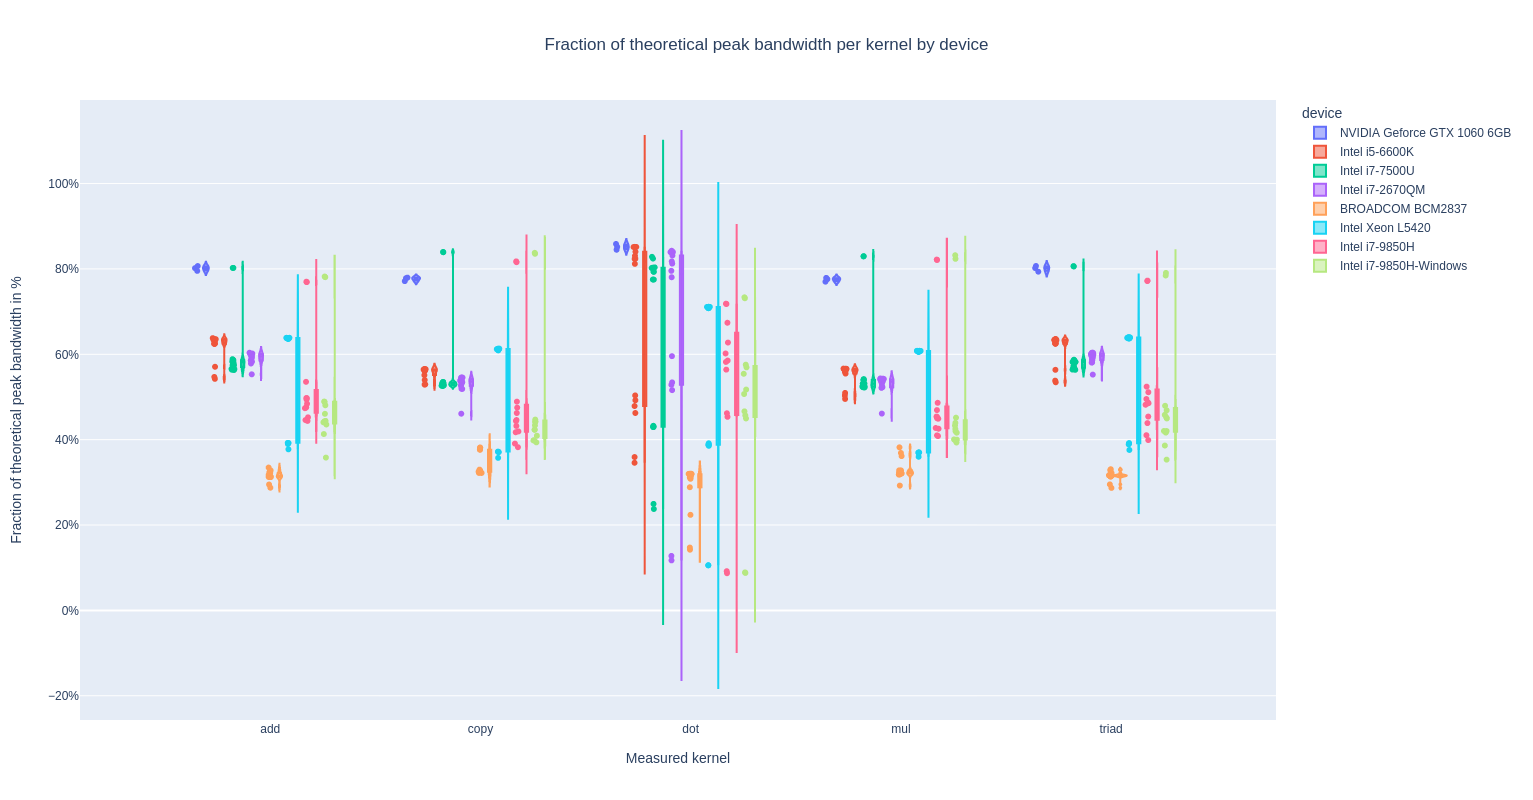

In [ ]:
# Violin Plot relative bamdwith values per function by device
fig = px.violin(df_measurements, x="function", y='Fraction of theoretical peak', color='device', hover_data=['device', 'measured'], height=800, width=1400, title = "Fraction of theoretical peak bandwidth per kernel by device", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured kernel')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/kernel-comparison.pdf")

In [ ]:
# Violin Plot relative bamdwith values per compiler by model
fig = px.violin(df_measurements, x="measured_compiler", y='Fraction of theoretical peak', color='measured_model', hover_data=['device', 'measured'], height=600, title = "Fraction of theoretical peak bandwidth per compiler by model", box=True, points='all').update(layout=dict(title=dict(x=0.5)))

In [ ]:
# Plot absolute bamdwith values per device by function
fig = px.bar(df_measurements, x="device", y="bandwidth [B/s]", color="function", height=600, title = "Bandwith per device by function").update(layout=dict(title=dict(x=0.5)))
fig.show()

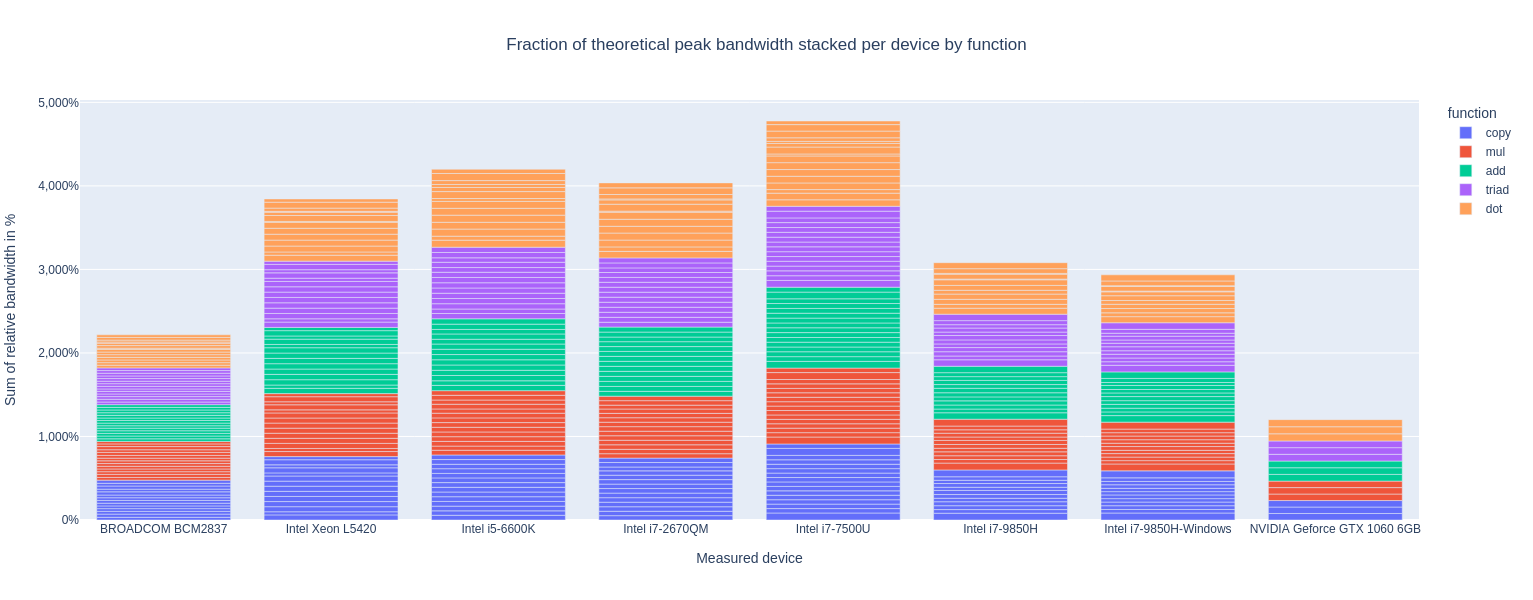

In [ ]:
# Plot relative bamdwith values per device by function
fig = px.bar(df_measurements, x="device", y="Fraction of theoretical peak", color="function", height=600, title = "Fraction of theoretical peak bandwidth stacked per device by function").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured device')
fig.update_yaxes(title_text='Sum of relative bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

#fig.write_image("results/device-comparison.pdf")

In [ ]:
# Plot relative bamdwith values per device by model
fig = px.bar(df_measurements, x="device", y="Fraction of theoretical peak", color="measured_model", height=600, title = "Bandwith per device by function").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured device')
fig.update_yaxes(title_text='Sum of relative bandwidth in % measured for functions within the model')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

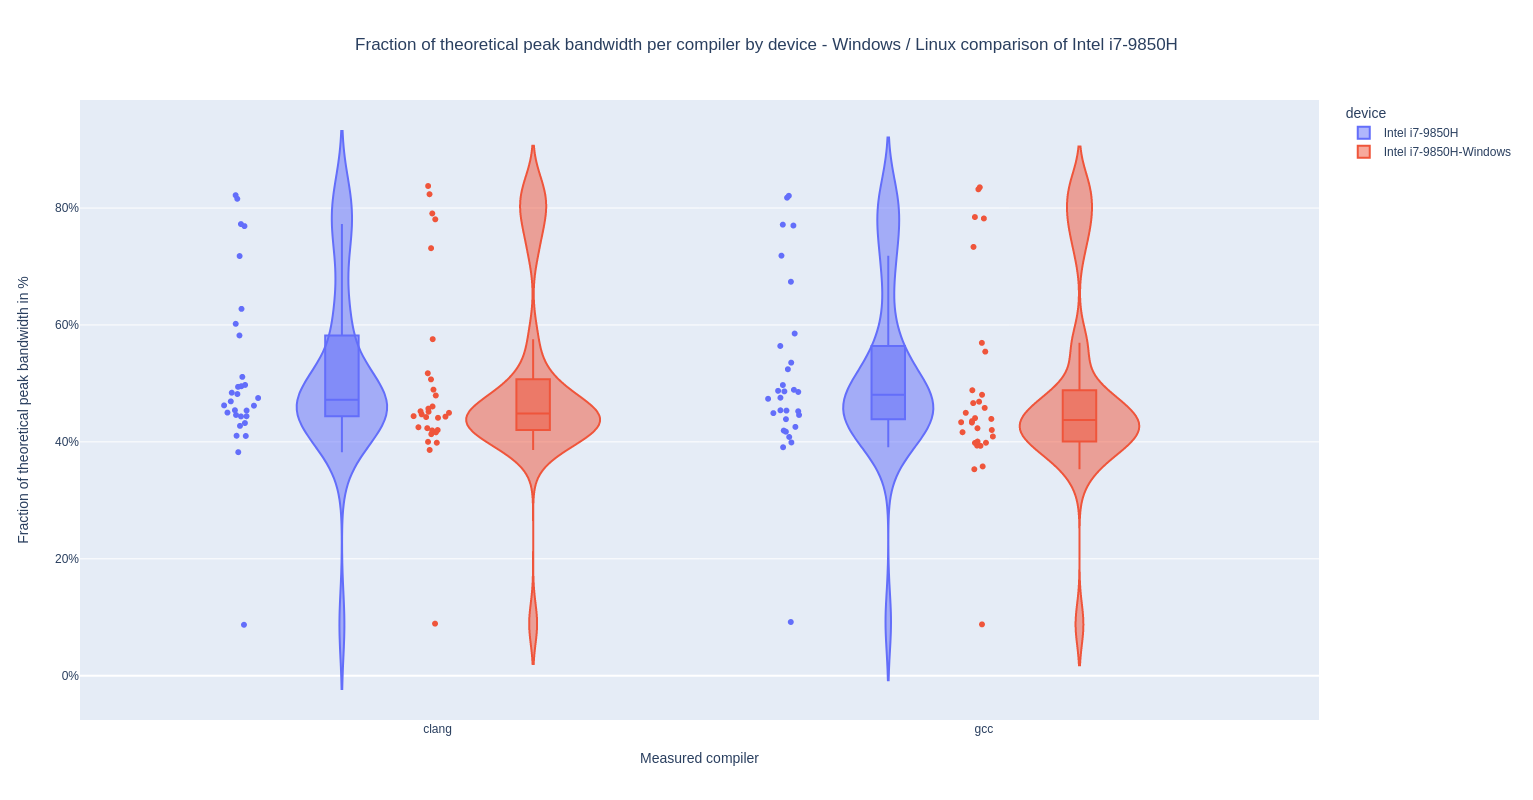

In [ ]:
# Violin Plot relative bamdwith values per measurement model by compiler ONLY NUC Windows and Linux
fig = px.violin(df_measurements.loc[(df_measurements['device']=='Intel i7-9850H') | (df_measurements['device']=='Intel i7-9850H-Windows')], x="measured_compiler", y="Fraction of theoretical peak", color='device', hover_data=['device', 'measured', 'function'], height=800, width=1400, title = "Fraction of theoretical peak bandwidth per compiler by device - Windows / Linux comparison of Intel i7-9850H", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured compiler')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/os-compiler-by-device.pdf")

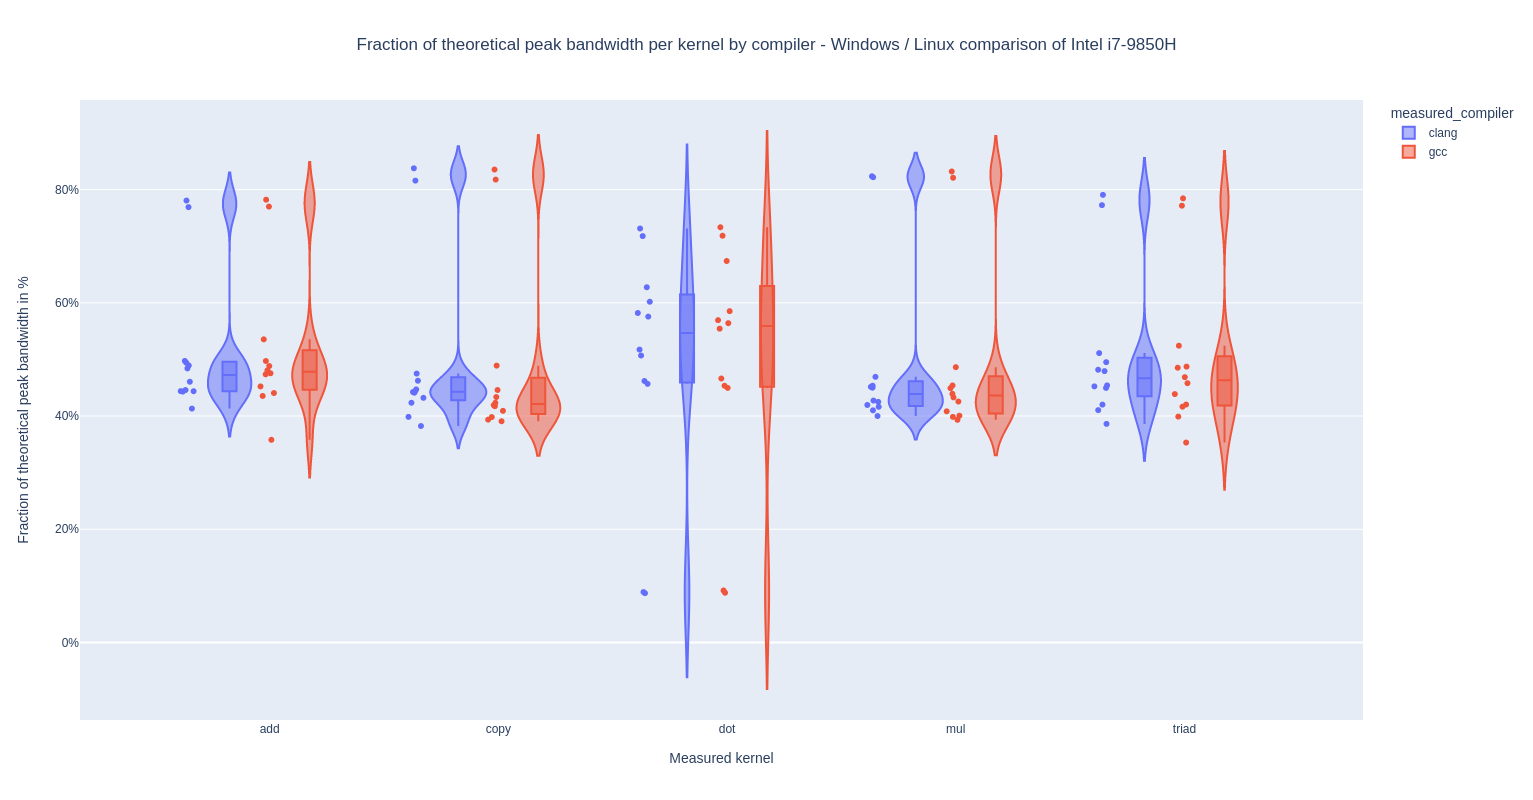

In [ ]:
# Violin Plot relative bamdwith values per measurement function by compiler  ONLY NUC Windows and Linux
fig = px.violin(df_measurements.loc[(df_measurements['device']=='Intel i7-9850H') | (df_measurements['device']=='Intel i7-9850H-Windows')], x="function", y="Fraction of theoretical peak", color='measured_compiler', hover_data=['device', 'measured'], height=800, width=1400, title = "Fraction of theoretical peak bandwidth per kernel by compiler - Windows / Linux comparison of Intel i7-9850H", box=True, points='all').update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured kernel')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

#fig.write_image("results/os-compiler-comparison-kernel.pdf")

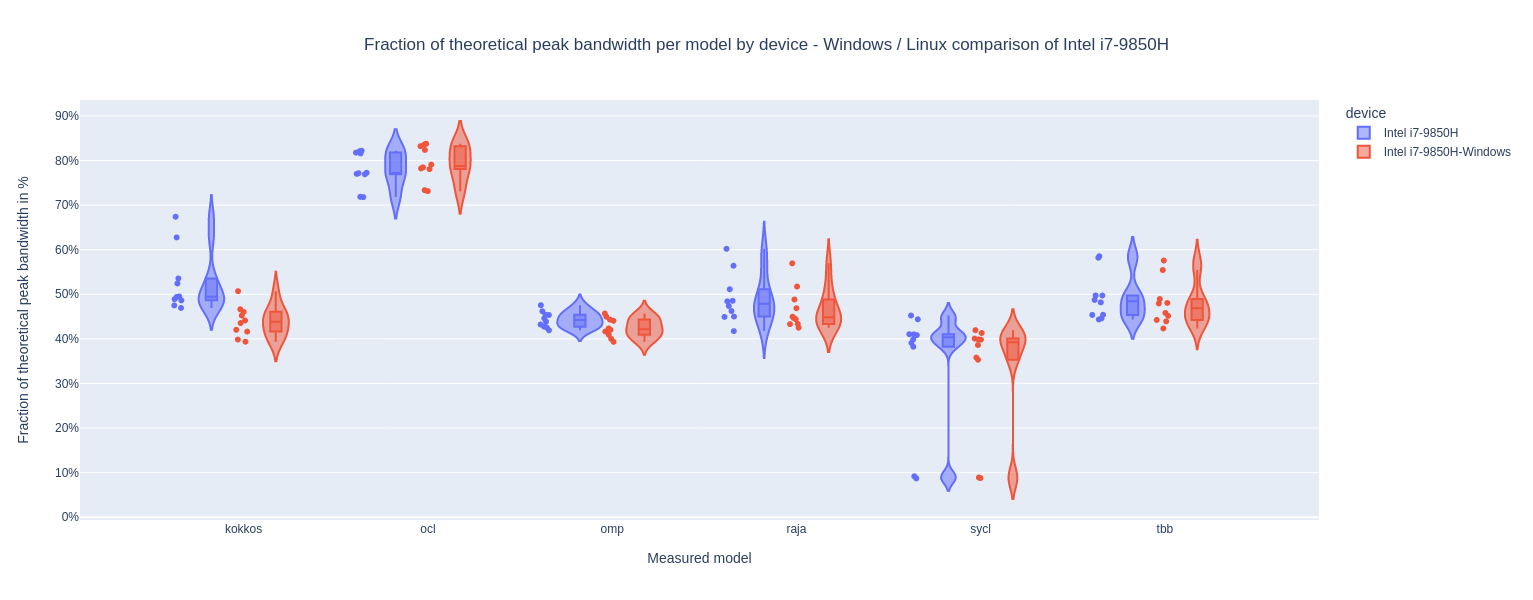

In [ ]:
# Plot relative bamdwith valies per measurement by function ONLY NUC Windows and Linux
fig = px.violin(df_measurements.loc[(df_measurements['device']=='Intel i7-9850H') | (df_measurements['device']=='Intel i7-9850H-Windows')], x='measured_model', y='Fraction of theoretical peak', color='device', hover_data=['device'], points="all", box=True, height=600, width=1400, title = "Fraction of theoretical peak bandwidth per model by device - Windows / Linux comparison of Intel i7-9850H").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured model')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/os-model-by-device.pdf")

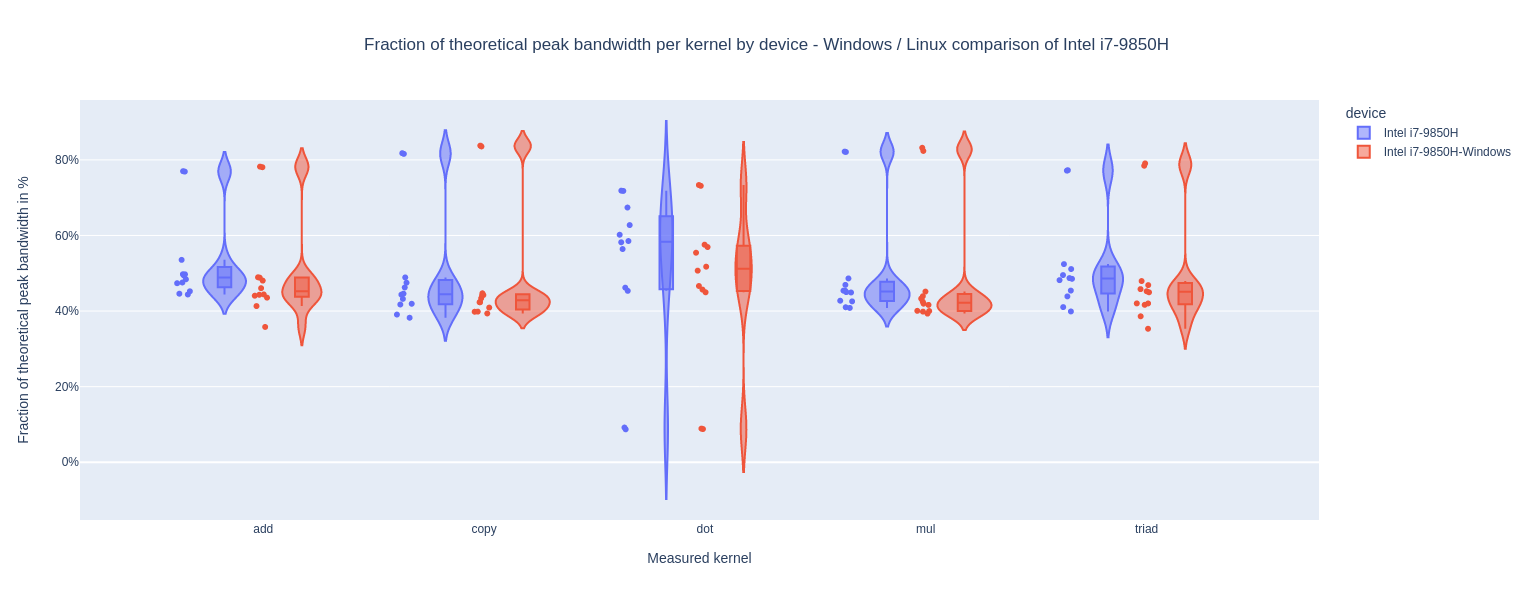

In [ ]:
# Plot relative bamdwith valies per measurement by function ONLY NUC Windows and Linux
fig = px.violin(df_measurements.loc[(df_measurements['device']=='Intel i7-9850H') | (df_measurements['device']=='Intel i7-9850H-Windows')], x='function', y='Fraction of theoretical peak', color='device', hover_data=['device'], points="all", box=True, height=600, width=1400, title = "Fraction of theoretical peak bandwidth per kernel by device - Windows / Linux comparison of Intel i7-9850H").update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(title_text='Measured kernel')
fig.update_yaxes(title_text='Fraction of theoretical peak bandwidth in %')
fig.layout.yaxis.tickformat = ',.0%'
fig.update_xaxes(categoryorder='category ascending')
fig.show()

fig.write_image("results/os-kernel-by-device.pdf")

In [ ]:
# Define pivot table for absolute bandwidth
pivot = pd.pivot_table(df_measurements, values=['bandwidth [B/s]'], 
                                index=['measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0,
                                margins=False).astype(int)
pivot = pivot.div(1024*1024).rename(columns={'bandwidth [B/s]': 'bandwidth [MB/s]'})

In [ ]:
#Define styles for pivot table

th_props = [
  ('font-size', '13px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '14px')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

cm = sns.light_palette("blue", as_cmap=True)

In [ ]:
# print absolute bandwidth as pivot table
pivot = pivot.style.format("{:,.0f}").background_gradient(cmap=cm, vmin=df_measurements['bandwidth [B/s]'].min()/(1000*1000), vmax=df_measurements['bandwidth [B/s]'].max()/(1000*1000)).set_table_styles(styles)
#pivot

In [ ]:
#pivot.plot.barh(figsize=(10,7))

In [ ]:
# Define pivot table for relative bandwidth - all functions
pivot1 = pd.pivot_table(df_measurements, values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0.000001,
                                margins=False)

# print relative bandwidth as pivot table
#pivot1 = pivot1.style.format("{:,.2f}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)
#pivot1

In [307]:
# Define pivot table for relative bandwidth - add
pivot_add = pd.pivot_table(df_measurements[df_measurements['function']=='add'], values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0,
                                margins=False)

# print relative bandwidth as pivot table
pivot_add = pivot_add.style.format("{:,.0%}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)

dfi.export(pivot_add, 'results/table-add.png')

pivot_add

In [308]:
# Define pivot table for relative bandwidth - copy
pivot_copy = pd.pivot_table(df_measurements[df_measurements['function']=='copy'], values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0.00000000001,
                                margins=False)

# print arelative bandwidth as pivot table
pivot_copy = pivot_copy.style.format("{:,.0%}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)

dfi.export(pivot_copy, 'results/table-copy.png')

pivot_copy

In [309]:
# Define pivot table for relative bandwidth - dot
pivot_dot = pd.pivot_table(df_measurements[df_measurements['function']=='dot'], values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0,
                                margins=False)

# print relative bandwidth as pivot table
pivot_dot = pivot_dot.style.format("{:,.0%}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)

dfi.export(pivot_dot, 'results/table-dot.png')

pivot_dot

In [310]:
# Define pivot table for relative bandwidth - mul
pivot_mul = pd.pivot_table(df_measurements[df_measurements['function']=='mul'], values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0,
                                margins=False)

# print relative bandwidth as pivot table
pivot_mul = pivot_mul.style.format("{:,.0%}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)

dfi.export(pivot_mul, 'results/table-mul.png')

pivot_mul

In [311]:
# Define pivot table for relative bandwidth - triad
pivot_triad = pd.pivot_table(df_measurements[df_measurements['function']=='triad'], values=['Fraction of theoretical peak'], 
                                index=['function', 'measured'], 
                                columns=['device'], 
                                aggfunc=np.mean,
                                dropna=True, fill_value=0,
                                margins=False)

# print relative bandwidth as pivot table
pivot_triad = pivot_triad.style.format("{:,.0%}").background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)

dfi.export(pivot_triad, 'results/table-triad.png')

pivot_triad

In [312]:
#Excel Export
#writer = pd.ExcelWriter('Pivot-Tables.xlsx')
# 
#for function in pivot1.index.get_level_values(0).unique():
#    temp_df = pivot1.xs(function, level=0).style.background_gradient(cmap=cm, vmin=0.0, vmax=1.0).set_table_styles(styles)
#    temp_df.to_excel(writer, index_label=function.upper() ,sheet_name=function)
# 
#writer.save()